In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [7]:
df = pd.read_csv('energy_data.csv')

In [8]:
df.head()

,timestamp,location,energy_consumption,temperature
0,01-01-2023 00:00,Industrial,139.101364,33.820542
1,01-01-2023 01:00,Residential,247.109808,26.392602
2,01-01-2023 02:00,Industrial,233.934693,25.027439
3,01-01-2023 03:00,Industrial,243.013532,27.107712
4,01-01-2023 04:00,Residential,313.502582,27.326153


In [9]:
X = df[['energy_consumption', 'temperature']]
X

,energy_consumption,temperature
0,139.101364,33.820542
1,247.109808,26.392602
2,233.934693,25.027439
3,243.013532,27.107712
4,313.502582,27.326153
...,...,...
9995,437.468420,31.507440
9996,147.061116,18.629344
9997,129.039725,24.528343
9998,164.020368,33.986510


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

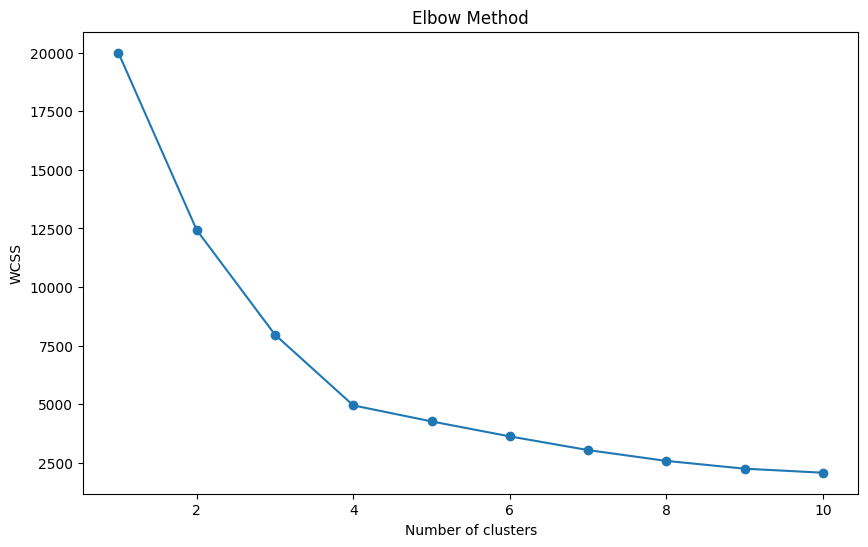

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle= '-')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

best_k = 3
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.37


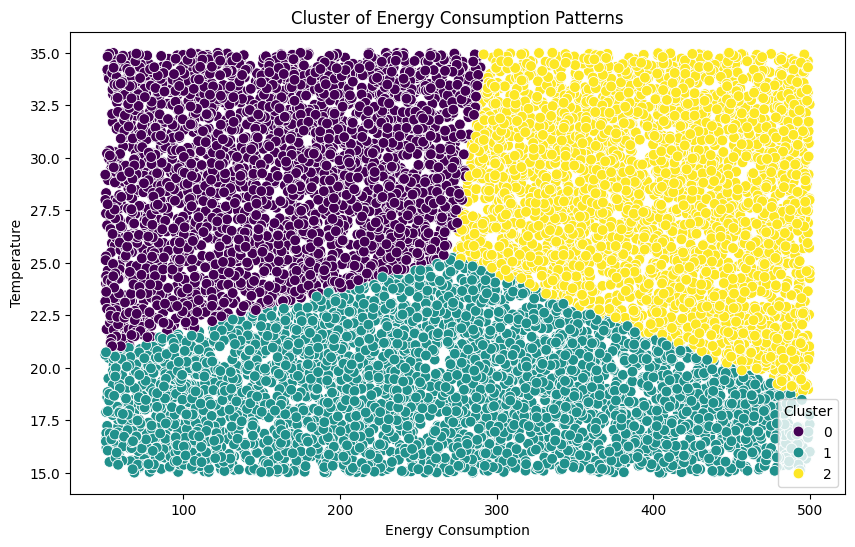

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_consumption', y = 'temperature', hue = 'cluster', data = df, palette = 'viridis', s=60)
plt.title('Cluster of Energy Consumption Patterns')
plt.xlabel('Energy Consumption')
plt.ylabel('Temperature')
plt.legend(title='Cluster')
plt.show()

In [14]:
import pandas as pd
df = pd.read_csv('green transportation system.csv')
df.head()

,energy_efficiency,co2_emissions,electric_vehicle_penetration,cost_efficiency,public_transport_usage
0,17.490802,106.046123,46.499916,2.095361,27.934722
1,29.014286,99.936814,19.225600,1.648231,15.689067
2,24.639879,76.423087,27.331985,2.911246,17.581553
3,21.973170,141.090001,43.164032,1.047446,20.840268
4,13.120373,121.493624,34.104467,1.969641,22.219200


In [15]:
df.shape

(10000, 5)

In [16]:
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.41590018, -0.45246481,  0.80188444,  0.482494  , -0.68431555],
       [ 1.58737745, -0.59325819, -1.10035932, -0.13641397, -1.38986562],
       [ 0.82691712, -1.13514888, -0.53498051,  1.61182405, -1.28082742],
       ...,
       [ 1.57344779, -0.69424553, -1.6759503 , -0.79294013,  0.87161312],
       [-0.33611361, -0.21159379, -0.34539599, -0.22283057,  0.0834761 ],
       [-0.96315712, -1.14859293, -0.84618813, -0.03906734,  1.26125511]],
      shape=(10000, 5))

In [17]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
df_new = pca_model.fit_transform(df_scaled)
df_new

array([[-0.62622824,  0.8439972 ],
       [ 0.44697393, -0.71684046],
       [-1.05553761, -0.7452157 ],
       ...,
       [ 0.19943734, -1.68503894],
       [ 0.07656694, -0.02949062],
       [-0.85326697, -0.55192491]], shape=(10000, 2))

In [18]:
df_new.shape

(10000, 2)

In [21]:
X_scaled

array([[-1.0542926 ,  1.52684411],
       [-0.21885876,  0.24236751],
       [-0.32076688,  0.0062966 ],
       ...,
       [-1.13211831, -0.08000961],
       [-0.86154675,  1.55554414],
       [ 1.359738  ,  0.28751874]], shape=(10000, 2))

<function matplotlib.pyplot.show(close=None, block=None)>

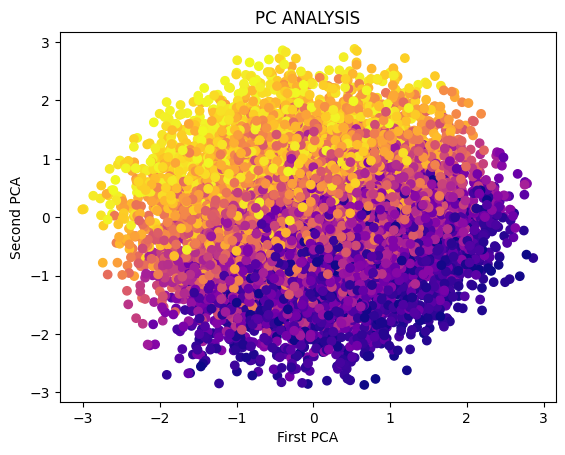

In [24]:
#Visualize THE CLUSTERS
plt.scatter(df_new[:, 0], df_new[:,1], c =df['electric_vehicle_penetration'] , cmap = 'plasma')
plt.title("PC ANALYSIS")
plt.xlabel("First PCA")
plt.ylabel("Second PCA")
plt.show